In [1]:
from lagrangian_trajectory_clustering.data_loading import (
    load_cape_verde_trajectories,
    load_labsea_trajectories,
    load_medsea_trajectories,
    subset_trajectories,
)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
import cartopy

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
data_cape_verde = subset_trajectories(
    load_cape_verde_trajectories(year=2011),
    num_traj=4_000,
    use_random=True,
    random_seed=123,
)
display(data_cape_verde)

time   latitude  longitude
traj obs                                          
2    0   1991-08-19 00:00:00  16.031740 -22.691440
     1   1991-08-20 00:00:00  16.005650 -22.726337
     2   1991-08-21 00:00:00  16.008749 -22.778380
     3   1991-08-22 00:00:00  16.037207 -22.783579
     4   1991-08-23 00:00:00  15.999703 -22.781057
...                      ...        ...        ...
9996 246 1992-06-04 00:00:00  10.828848 -49.115750
     247 1992-06-05 00:00:00  10.788542 -49.328068
     248 1992-06-06 00:00:00  10.769365 -49.549206
     249 1992-06-07 00:00:00  10.754749 -49.778340
     250 1992-06-07 12:00:00  10.761526 -49.892895

[1042856 rows x 3 columns]

In [4]:
data_labsea = subset_trajectories(
    load_labsea_trajectories(),
    num_traj=4_000,
    use_random=True,
    random_seed=123,
)
display(data_labsea)

latitude  longitude                 time
traj obs                                           
2    0    59.825405 -45.383000  1990-01-03 12:00:00
     1    60.266100 -42.798218  1989-12-29 12:00:00
     2    61.821384 -41.664980  1989-12-24 12:00:00
     3    63.080612 -40.968250  1989-12-19 12:00:00
     4    64.359460 -39.596740  1989-12-14 12:00:00
...             ...        ...                  ...
9996 726        NaN        NaN                  NaN
     727        NaN        NaN                  NaN
     728        NaN        NaN                  NaN
     729        NaN        NaN                  NaN
     730        NaN        NaN                  NaN

[2924000 rows x 3 columns]

In [5]:
data_medsea = subset_trajectories(
    load_medsea_trajectories(),
    num_traj=4_000,
    use_random=True,
    random_seed=123,
)
display(data_medsea)

time   latitude  longitude
traj  obs                                          
2     0   2017-04-05 00:00:00  43.288410   5.178498
      1   2017-04-05 01:00:00  43.285675   5.177588
      2   2017-04-05 02:00:00  43.283050   5.176386
      3   2017-04-05 03:00:00  43.280525   5.174908
      4   2017-04-05 04:00:00  43.278090   5.173171
...                       ...        ...        ...
10001 957 2017-06-11 21:00:00  36.128925  -0.050118
      958 2017-06-11 22:00:00  36.132336  -0.038280
      959 2017-06-11 23:00:00  36.135900  -0.026463
      960 2017-06-12 00:00:00  36.139637  -0.014653
      961 2017-06-12 00:00:00  36.139957  -0.013668

[3848000 rows x 3 columns]

CPU times: user 1min 1s, sys: 227 ms, total: 1min 1s
Wall time: 1min 1s


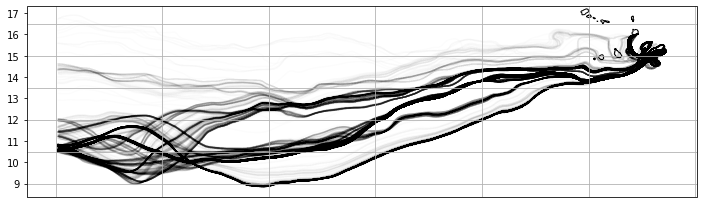

In [7]:
%%time

fig, ax = plt.subplots(
    1, 1,
    figsize=(12, 12),
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
)

(
    data_cape_verde
    .groupby("traj")
    .plot.line(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=0.01, color="black",
        transform=cartopy.crs.PlateCarree()
    )
)
ax.gridlines()    
_ = ax.coastlines();

CPU times: user 1min 29s, sys: 352 ms, total: 1min 30s
Wall time: 1min 29s


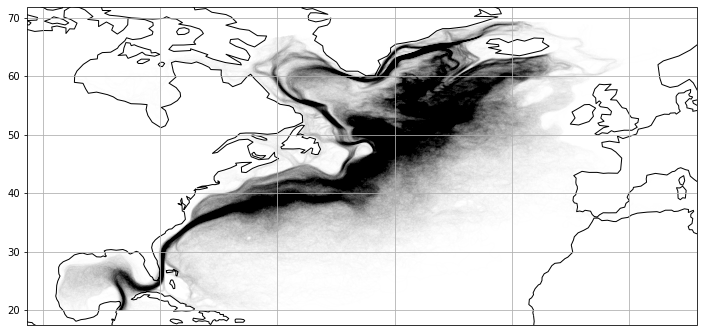

In [8]:
%%time

fig, ax = plt.subplots(
    1, 1,
    figsize=(12, 12),
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
)

(
    data_labsea
    .groupby("traj")
    .plot.line(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=0.002, color="black",
        transform=cartopy.crs.PlateCarree()
    )
)
ax.gridlines()    
_ = ax.coastlines();

CPU times: user 1min 5s, sys: 166 ms, total: 1min 5s
Wall time: 1min 5s


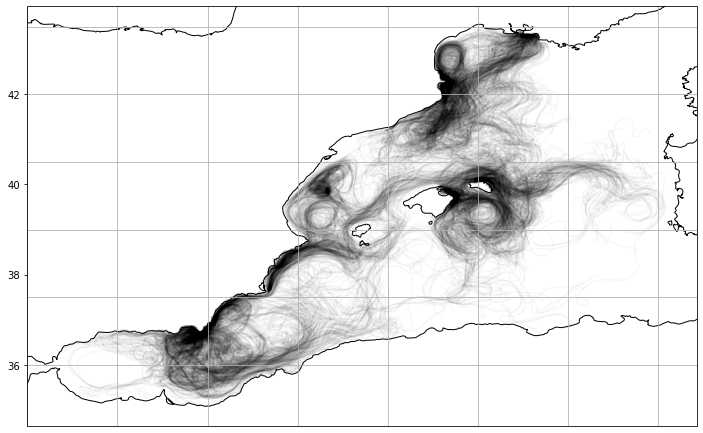

In [11]:
%%time

fig, ax = plt.subplots(
    1, 1,
    figsize=(12, 12),
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
)

(
    data_medsea
    .groupby("traj")
    .plot.line(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=0.03, color="black",
        transform=cartopy.crs.PlateCarree()
    )
)
ax.gridlines()    
_ = ax.coastlines();